In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from datetime import datetime



In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib import rc

plt.rc('font', family='AppleGothic')  # window인 경우 NanumGothic
sns.set(font='AppleGothic', style='white')
plt.rcParams['axes.unicode_minus'] = False


In [3]:
demo = pd.read_csv('data/LPOINT_BIG_COMP_01_DEMO.csv') # 고객 데모 정보
pdde = pd.read_csv('data/LPOINT_BIG_COMP_02_PDDE.csv')# 상품구매정보
cop_u = pd.read_csv('data/LPOINT_BIG_COMP_03_COP_U.csv') # 제휴사이용정보
pd_clac = pd.read_csv('data/LPOINT_BIG_COMP_04_PD_CLAC.csv') # 상품분류정보
br = pd.read_csv('data/LPOINT_BIG_COMP_05_BR.csv') # 점포 정보
lpay = pd.read_csv('data/LPOINT_BIG_COMP_06_LPAY.csv') # 엘페이 이용

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
br.head()

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


In [5]:
lpay.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500


# Demo

In [6]:
demo.describe()

,cust,ma_fem_dv,ages,zon_hlv
count,29913,29913,29913,29913
unique,29913,2,6,17
top,M544340024,여성,40대,Z10
freq,1,20083,9863,8157


In [7]:
demo['ma_fem_dv'].value_counts()

여성    20083
남성     9830
Name: ma_fem_dv, dtype: int64

In [8]:
demo['ages'].value_counts()

40대    9863
30대    7736
50대    5633
20대    3853
60대    2115
70대     713
Name: ages, dtype: int64

<AxesSubplot:xlabel='ages', ylabel='cust'>

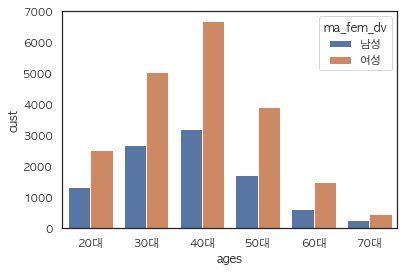

In [9]:
# 연령 성별
sns.barplot(data = demo.groupby(['ages','ma_fem_dv'])['cust'].count().reset_index(), x = 'ages', y = 'cust', hue = 'ma_fem_dv')

<AxesSubplot:xlabel='zon_hlv', ylabel='cust'>

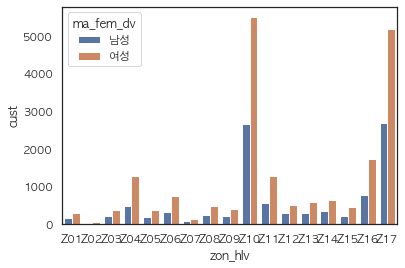

In [10]:
# 성별 지역
sns.barplot(data = demo.groupby(['zon_hlv','ma_fem_dv'])['cust'].count().reset_index(), x = 'zon_hlv', y = 'cust', hue = 'ma_fem_dv')

<AxesSubplot:xlabel='zon_hlv', ylabel='cust'>

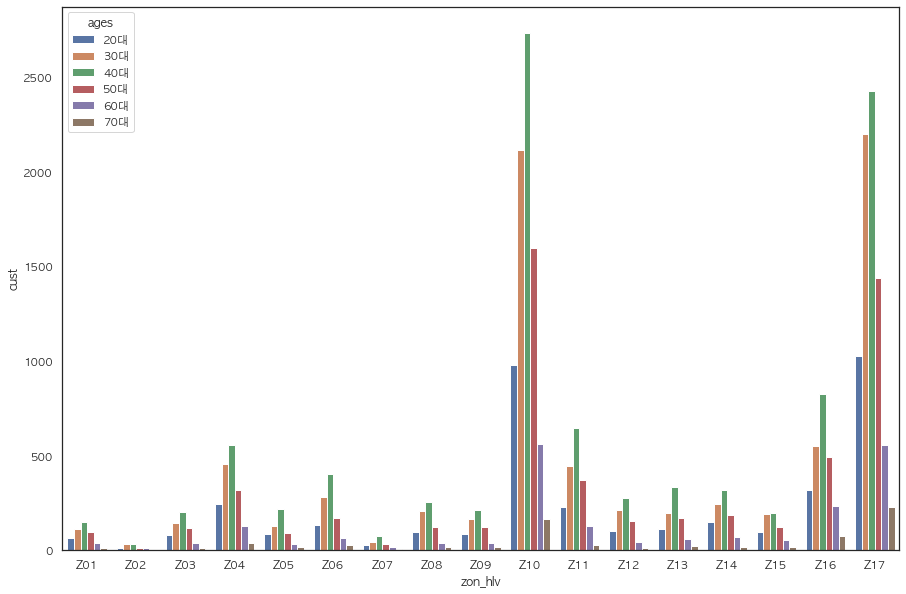

In [11]:
plt.figure(figsize=(15,10))
# 연령, 지역
sns.barplot(data = demo.groupby(['zon_hlv','ages'])['cust'].count().reset_index(), x = 'zon_hlv', y = 'cust', hue = 'ages')

# PDDE

- rct_no : 장바구니 식별
- chnl_dv : 채널 구별
- cop_c : 제휴사 구분
- br_c : 점포 구분
- pd_c : 상품 코드
- de_dt : 구매일자

In [12]:
pdde.head(2)

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1


In [13]:
pdde.shape

(4381743, 10)

In [14]:
pdde['rct_no'].nunique()

1266589

In [15]:
pdde['chnl_dv'].value_counts()  # 오프라인 : 1, 온라인 : 2 

1    3953242
2     428501
Name: chnl_dv, dtype: int64

In [16]:
pdde['cop_c'].value_counts()  # A01 ~ 06 : 유통사

A02    2374970
A03     905691
A01     700350
A04     316401
A06      76160
A05       8171
Name: cop_c, dtype: int64

In [17]:
pdde.groupby(['cust'])['rct_no'].count().sort_values()

cust
M334677481        1
M951929550        1
M921894981        1
M872071600        1
M297775395        1
              ...  
M124357021     2143
M763326819     2524
M287960590     2564
M919374790    10049
M057015266    12448
Name: rct_no, Length: 26917, dtype: int64

In [18]:
pdde_cnt = pdde.groupby(['cust'])['rct_no'].count().reset_index()
pdde_cnt[pdde_cnt['rct_no']==1].shape
#pdde_cnt[pdde_cnt['rct_no']!= 1].hist()

(1033, 2)

In [19]:
pdde_cnt.describe()

,rct_no
count,26917.000000
mean,162.787198
std,227.442772
min,1.000000
25%,30.000000
50%,88.000000
75%,214.000000
max,12448.000000


array([[<AxesSubplot:title={'center':'rct_no'}>]], dtype=object)

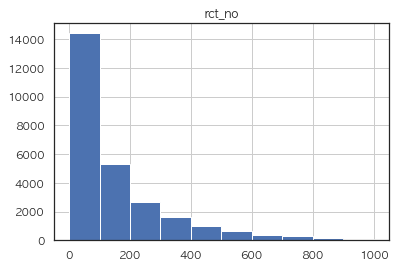

In [20]:
pdde_cnt[pdde_cnt['rct_no']<= 1000].hist()
# 고객 주문 수 분포

array([[<AxesSubplot:title={'center':'rct_no'}>]], dtype=object)

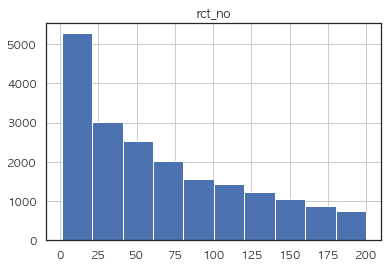

In [21]:
pdde_cnt[pdde_cnt['rct_no']<= 200].hist()